# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n_orders = 500

order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [ ]:
#Load the data
data = pd.read_csv("ecommerce_data.csv")
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


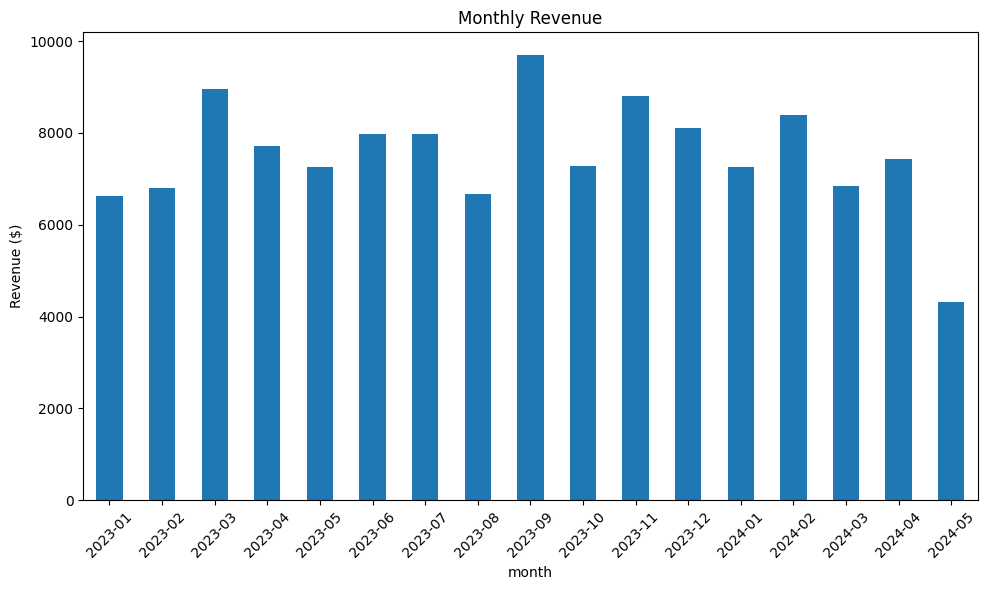

In [ ]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [5]:
# Your code here
last_quarter = data[(data["order_date"] >= "2024-03-01") & (data["order_date"] <= "2024-06-30")]
rev_by_month = last_quarter.groupby(last_quarter["order_date"].dt.to_period("M"))["revenue"].sum().round(2)
total_revenue = rev_by_month.sum()

print("Revenue (Apr–Jun 2024):")
print(rev_by_month)
print(f"\nLast Quarter's Total Revenue: ${total_revenue:,.2f}")

Revenue (Apr–Jun 2024):
order_date
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64

Last Quarter's Total Revenue: $18,580.73


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [6]:
# Your code here
top_customers = (
    data.groupby("customer_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 Customers: ", top_customers)

Top 5 Customers:  customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [ ]:
# Your code here
avg_segment = (
    data.groupby("customer_segment")["revenue"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)
print("Which type of customer spends the most: ", avg_segment)

Which type of customer spends the most:  customer_segment
Senior          262.13
Professional    255.65
Student         253.81
Name: revenue, dtype: float64


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [ ]:
# Your code here
region = (
    data.groupby("region")
    .agg(total_revenue=("revenue", "sum"), avg_order_value=("revenue", "mean"))
    .round(2)
    .sort_values(by="total_revenue", ascending=False)
)
print(region)

        total_revenue  avg_order_value
region                                
South        34839.45           274.33
North        34351.69           258.28
East         31221.80           240.17
West         27727.73           252.07


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [12]:
# Your code here
quantity_category = data.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
revenue_category = data.groupby("product_category")["revenue"].sum().sort_values(ascending=False)

print("Most Popular by Quantity: ", quantity_category)
print("\nMost Popular by Revenue: ", revenue_category)

Most Popular by Quantity:  product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Most Popular by Revenue:  product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [ ]:
# Your code here
data["discount_flag"] = np.where(data["discount_applied"] > 0, "Discounted", "No Discount")
discount = (
    data.groupby("discount_flag")["revenue"]
    .mean()
    .round(2)
)
print("Average Revenue per Order: ", discount)

Average Revenue per Order:  discount_flag
Discounted     263.83
No Discount    248.30
Name: revenue, dtype: float64


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [14]:
# Your code here
payment_pct = (
    data["payment_method"].value_counts(normalize=True) * 100
).round(2)
payment_avg_rev = (
    data.groupby("payment_method")["revenue"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)
print("Payment Method Usage (% of Orders): ", payment_pct)
print("\nAverage Revenue per Payment Method: ", payment_avg_rev)

Payment Method Usage (% of Orders):  payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average Revenue per Payment Method:  payment_method
Debit Card     275.98
Credit Card    257.44
Gift Card      254.36
PayPal         236.07
Name: revenue, dtype: float64


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

/tmp/ipykernel_9165/1119524442.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_revenue.index, y=day_revenue.values, palette="coolwarm")


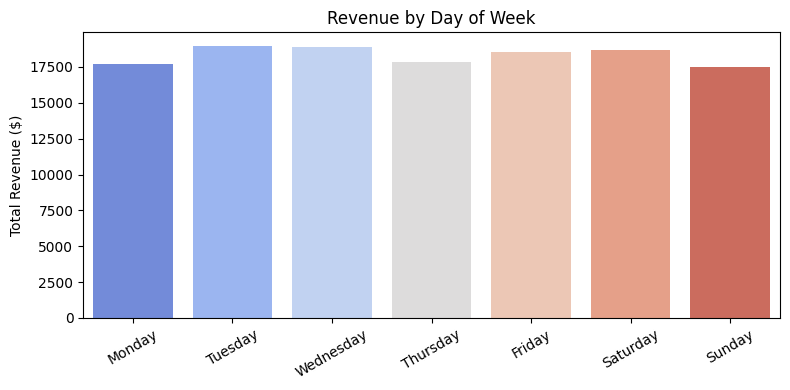

Revenue by Day of Week:  day_of_week
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64


In [15]:
# Your code here
day_revenue = (
    data.groupby("day_of_week")["revenue"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    .round(2)
)

plt.figure(figsize=(8,4))
sns.barplot(x=day_revenue.index, y=day_revenue.values, palette="coolwarm")
plt.title("Revenue by Day of Week")
plt.ylabel("Total Revenue ($)")
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print("Revenue by Day of Week: ", day_revenue)

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [ ]:
# Your code here
data["profit"] = data["revenue"] * 0.20
total_profit = data["profit"].sum().round(2)
profit_by_region = (
    data.groupby("region")["profit"]
    .sum()
    .round(2)
    .sort_values(ascending=False)
)
print(f"Total Estimated Profit: ${total_profit:,.2f}\n")
print("Profit by Region: ", profit_by_region)

Total Estimated Profit: $25,628.13

Profit by Region:  region
South    6967.89
North    6870.34
East     6244.36
West     5545.55
Name: profit, dtype: float64


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

1. Revenue (Apr–Jun 2024)
Total: $18.6K, strongest in April. Slight dip in May suggests a mid-quarter slowdown.

2. Top Customers
Top 5 (IDs 62, 24, 90, 92, 97) contribute most revenue → focus on retention & loyalty offers.

3. Segments
Seniors spend the most per order (~$262) → target with premium or convenience bundles.

4. Regions
South leads in total and average order value; West underperforms → shift marketing focus southward.

5. Products
Home category dominates in both quantity and revenue → expand this line or bundle offers.

6. Discounts
Discounted orders yield higher avg. revenue → use limited-time promotions strategically.

7. Seasonality
Sales steady across week; slight weekday strength → test mid-week campaigns.

8. Profitability
Profit ≈ $25.6K; South region most profitable → continue optimizing pricing & logistics there.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.